# 10장. 데이터 다루기(Data Handling)

###   

## 10.0 시작에 앞서..
: 이전 챕터에서 활용되었던 함수 및 패키지, 모듈 호출

In [1]:
import math, random
from matplotlib import pyplot as plt
from collections import Counter

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

def normal_cdf(x,mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2)/sigma)) /2 

###   

## 10.1 데이터 검색하기

###   


### 10.1.1 1차원 데이터 탐색하기
: 우선 1차원 데이터가 주어졌을 땐 가장 먼저 요약 통계치(Summary Statistics)를 계산해봐야한다.

- 우선 히스토그램을 만들어보고자 한다.

In [2]:


def bucketize(point, bucket_size):
    """각 데이터를 bucket_size의 배수에 해당하는 구간에 위치시킨다."""
    """분위 값으로 해당 값을 나눠준 뒤 올림을 해준 뒤 분위값을 곱해서 값들을 동일하게 맞춰준다."""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """구간을 생성하고 각 가군 내 데이터 개수를 계산해 준다."""
    """각 분위마다 몇 개의 값이 실제하는 지 계산한다."""
    return Counter(bucketize(point,bucket_size) for point in points )

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points,bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title(title)
    plt.show()

In [3]:
random.seed(0)

# -100과 100 사이의 균등분포
uniform = [200 * random.random() - 100 for _ in range(10000)]

# 평균이 0이고 표준편차가 57인 정규분포
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000) ]

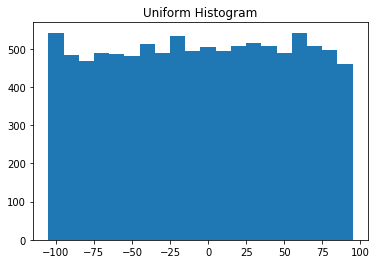

In [4]:
plot_histogram(uniform, 10, "Uniform Histogram")

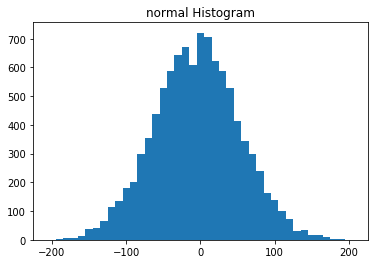

In [5]:
plot_histogram(normal, 10, "normal Histogram")

### 10.1.2 2차원 데이터
: 추가적으로 하루평균 사이트에서 보내는 시간 뿐 아니라 데이터 과학 경력 또한 주어졌을 경우.


In [6]:
def random_normal():
    """표준 정규분포를 따르는 임의의 데이터를 반환"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(10000)]
ys1 = [ x + random_normal()/2 for x in xs]
ys2 = [- x + random_normal()/2 for x in xs]

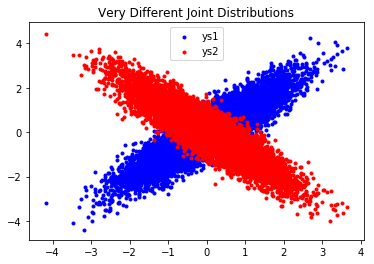

In [7]:
plt.scatter(xs,ys1,marker='.',color ='blue',label='ys1')
plt.scatter(xs,ys2,marker='.',color ='red',label='ys2')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [8]:
print (correlation(xs,ys1))
print (correlation(xs,ys2))

NameError: name 'correlation' is not defined

In [ ]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        # 편차가 존재하지 않는다면 상관관계는 0
        return 0
    
def standard_deviation(x):
    return math.sqrt(variance(x))

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def mean(x):
    return sum(x) / len(x)

def sum_of_squares(v):
    return dot(v,v)

def dot(v,w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y)) / (n - 1)

def shape(A):
    num_rows = len(A)
    num_columns = len(A[0]) if A else 0
    return num_rows, num_columns

def get_column(A,j):
    return [A_i[j] for A_i in A]

### 10.1.3 다차원 데이터
:다차원 데이터의 경우 각 차원이 서로 어떻게 연관되어 있는지 살펴볼 수 있다.

In [ ]:
def correlation_matrix(data):
    """(i,j)번째 항목이 i번째 차원과  j번째 차원의 상관관계를 나타내는 num_columns x num_columns 행렬 반환"""
    _, num_columns = shape(data)
    
    def matrix_entry(i,j):
        return correlation(get_column(data,i), get_column(data,j))
    
    return make_matrix(num_columns, num_columns,matrix_entry)

import matplotlib.pyplot as plt

In [ ]:
# first, generate some random data

num_points = 100

def random_row():
    row = [None, None, None, None]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row
random.seed(0)
data = [random_row()
        for _ in range(num_points)]



_,num_columns = shape(data)

fig, ax = plt.subplots(num_columns,num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        # x축은 j번째 열을, y축은 i번째 행을 나타내는 산포도
        if i != j: ax[i][j].scatter(get_column(data,j),get_column(data,i))
        
        # 만약 i == j, series 라는 제목 출력
        else: ax[i][j].annotate("series "+str(i), (0.5,0.5),
                               xycoords='axes fraction',
                               ha='center',va='center')
        #왼쪽과 밑에 위치한 차트에만 축 레이블 명시
        if i < num_columns -1 : ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
#밑에서 가장 오른쪽 그리고 ㅇ왼쪽에서
#가장 위에 위치한 차트 안에는 문자열만 있기 때문에
# 축 레이블을 고정

ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_xlim(ax[0][1].get_ylim())

plt.show()

## 10.2 정제하고 합치기

In [9]:
#기존에 형변환했던 방법
#closing_price = float(row[2])

In [10]:

def  parse_row(input_row, parsers):
    """파서 list(None이 포함될 수도 있다)가 주어지면 각 input_row의 항목에 적절한 파서를 적용"""
    return [parser(value) if parser is not None else value for value, parser in zip(input_row, parsers)]

def parse_rows_with(reader, parsers):
    """각 열에 파서를 적용하기 위해 reader를 치환"""
    for row in reader:
        yield parse_row(row, parsers)

def try_or_none(f):
    """f가 하나의 입력값을 받는다고 가정하고, 오류가 발생하면 f는 None을 반환해주는 함수로 치환하자"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]

In [11]:
import dateutil.parser, csv

data  =  []

with  open("./data/comma_delimited_stock_prices.csv", "r", encoding='utf8', newline='') as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)
        

for row in data:
    if any(x is None for x in row):
        print(row)

[None, '90.91']
[None, '41.68']
[None, '64.5']


In [12]:
for row in data:
    if any(x is None for x in row):
        print(row)

[None, '90.91']
[None, '41.68']
[None, '64.5']


In [13]:
def try_parse_field(field_name, value, parser_dict):
    """parse_dict에 포함되어 있는 파서 중에 하나로 파싱"""
    parser = parser_dict.get(field_name)# 만약 필드 이름이 존재하지 않으면 None을 반환
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value
    
def parse_dict(input_dict,parser_dict):
    return {field_name: try_parse_field(field_name,value,parser_dict) for field_name, value in input_dict.itertitems()}

## 10.3 데이터 처리
: 데이터를 처리하는 기술

In [16]:
import datetime
data = [{'closing_price':102.06,'date':datetime.datetime(2014,8,29,0,0),'symbol' :'AAPL'}]

In [17]:
max_aapl_price = max(row["closing_price"] for row in data if row["symbol"]=='AAPL')

In [22]:
from collections import defaultdict
# Symbol을 기준으로 행을 그룹화
by_symbol = defaultdict(list)
for row in data:
    by_symbol[row["symbol"]].append(row)


In [24]:
# list comprehension으로 각 그룹의 최고치 계산
max_price_by_symbol = {symbol : max(row["closing_price"] for row in grouped_rows) for symbol,grouped_rows in by_symbol.items()}

In [30]:
def picker(field_name):
    """dict의 특정 필드를 선택해주는 함수를 반환"""
    return lambda row: row[field_name]

def pluck(field_name, rows):
    """dict list를 필드 리스트로 변환"""
    return list(map(picker(field_name),rows))

In [31]:
def group_by(grouper,rows,value_transform=None):
    # Key는 Grouper의 결과값이며 value는 각 그룹에 속하는 모든 행의 list
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else: return {key: value_transform(rows) for key,rows in grouped.items()}

In [32]:
max_price_by_symbol = group_by(picker("symbol"),data, lambda rows: max(pluck("closing_price",rows)))